<a href="https://colab.research.google.com/github/yasmine-draoui/new/blob/main/one_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Activation,Dropout
from tensorflow.keras.layers import MaxPooling1D,GlobalAveragePooling1D
import pandas as pd 
import numpy as np 
import nltk as nltk  

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/all_clean_data.csv' )


In [ ]:
#df = df.drop(df.columns[[ 0 ]],axis = 1)
#df.head()

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/tweet_dataset.csv')
df2.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier a...,@tiffanylue i know i was listenin to bad habi...,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,We want to trade with someone who has Houston...,@dannycastillo We want to trade with someone w...,82565a56d3,neutral,We want to trade with someone who has Houston ...


Supprimer les colonnes non nécéssaires

In [ ]:
df2 = df2.drop(df2.columns[[ 0, 1, 2, 4, 5, 7]],axis = 1)
df2.head()


,text,new_sentiment
0,i know i was listenin to bad habit earlier a...,NaN
1,Layin n bed with a headache ughhhh...waitin o...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,We want to trade with someone who has Houston...,neutral


Renommer la colonne des sentiments

In [ ]:
df2= df2.rename(columns = {'new_sentiment':'sentiment'})
df2.head()


,text,sentiment
0,i know i was listenin to bad habit earlier a...,NaN
1,Layin n bed with a headache ughhhh...waitin o...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,We want to trade with someone who has Houston...,neutral


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/vax_tweets_sentiment.csv')

In [ ]:
df3 = df3.drop(df3.columns[[ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18]],axis = 1)

In [ ]:
new_data = pd.concat([df2, df3])
new_data.head()

,text,sentiment
0,i know i was listenin to bad habit earlier a...,NaN
1,Layin n bed with a headache ughhhh...waitin o...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,We want to trade with someone who has Houston...,neutral


In [ ]:
new_data.shape

(69452, 2)

In [ ]:
new_data= new_data.dropna()

In [ ]:
new_data.shape

(60774, 2)

In [ ]:
#lab_to_sentiment = {
 #   "-":"Negative", 
  #  "+":"Positive", 
   #  "0" : "Neutral", 
    #"negative":"Negative", 
 #   "positive":"Positive", 
  #  "neutral": "Neutral" 
  #  }
#new_data['sentiment'] = new_data['sentiment'].apply(lambda x: lab_to_sentiment[x])
#new_data.head()

In [ ]:
#%
new_data.sentiment.value_counts(normalize=True)

neutral     0.512851
positive    0.268668
negative    0.218482
Name: sentiment, dtype: float64

Text(0.5, 1.0, 'Sentiment Data Distribution')

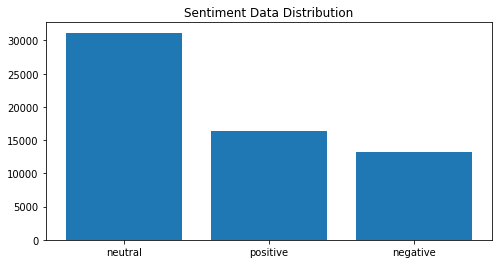

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
val_count = new_data.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

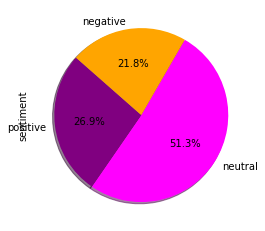

In [ ]:
#Change pie chart colors here
#mon7ana 
colors = ["magenta", "purple", "orange"]
new_data.sentiment.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,colors=colors)
plt.show()


In [ ]:
#new_data.set_option('display.max_colwidth', 200)

**Normalisation
miniscule
Suppression des ponctuations**

In [ ]:
import re
print('Before: ', new_data['text'].values[17])
def remove_punct(text):
    # supprimer les numero
    res = ''.join([i for i in text if not i.isdigit()])
    new_text = re.sub(' +', ' ', re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",res))
    return new_text

new_data['text_'] = new_data['text'].apply(lambda x: remove_punct(x.lower()))
print('After: ', new_data['text_'].values[17])
new_data.head()   

Before:   oh too bad! I hope it gets better. I`ve been having sleep issues lately too
After:   oh too bad i hope it gets better i ve been having sleep issues lately too


,text,sentiment,text_
1,Layin n bed with a headache ughhhh...waitin o...,negative,layin n bed with a headache ughhhh waitin on y...
2,Funeral ceremony...gloomy friday...,negative,funeral ceremony gloomy friday
3,wants to hang out with friends SOON!,positive,wants to hang out with friends soon
4,We want to trade with someone who has Houston...,neutral,we want to trade with someone who has houston...
5,Re-pinging : why didn`t you go to prom? BC my ...,negative,re pinging why didn t you go to prom bc my bf ...


**remove stopwords**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Remove stopwords
#from nltk.corpus import stopwords
#stopwords_En = nltk.corpus.stopwords.words('english')
r = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
print('before: ', new_data['text_'].values[17])
def remove_stopwords(tokenized_list):
    # cette code after toknization text = [word for word in tokenized_list if word not in stopwords_En]
    #return text
    t = nltk.word_tokenize(tokenized_list) 
    return ' '.join([word for word in t if word not in r])

new_data['text_'] = new_data['text_'].apply(lambda x: remove_stopwords(x))
new_data['text2_'] = new_data['text_'].apply(lambda x: remove_stopwords(x))
print('after: ', new_data['text_'].values[17])

before:   oh too bad i hope it gets better i ve been having sleep issues lately too
after:  oh bad hope gets better sleep issues lately


**Minimizer le text et lemmatizer**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
 
lemmatizer = WordNetLemmatizer()
print('befor: ', new_data['text_'].values[17])
# Define function to lemmatize each word with its POS tag
 
# POS_TAGGER_FUNCTION : TYPE 1
def pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None
def lem_pos_tag(text):
    #sentence = 'the cat is sitting with the bats on the striped mat under many badly flying geese'
    sentence = text
    # tokenize the sentence and find the POS tag for each token
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
 
    #print(pos_tagged)
 
    # As you may have noticed, the above pos tags are a little confusing.
 
    # we use our own pos_tagger function to make things simpler to understand.
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged))
    #print(wordnet_tagged)
    #>[('the', None), ('cat', 'n'), ('is', 'v'), ('sitting', 'v'), ('with', None),
    # ('the', None), ('bats', 'n'), ('on', None), ('the', None), ('striped', 'a'),
    # ('mat', 'n'), ('under', None), ('many', 'a'), ('flying', 'v'), ('geese', 'a')]
 
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is  None:
           # if there is no available tag, append the token as is
           lemmatized_sentence.append(lemmatizer.lemmatize(word))
        else:
           # if there is no available tag, append the token as is
           lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    lemmatized_sentence = " ".join(lemmatized_sentence)
    return lemmatized_sentence
new_data['text_'] = new_data['text_'].apply(lambda x: lem_pos_tag(x))
print('after: ', new_data['text_'].values[17])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


befor:  oh bad hope gets better sleep issues lately
after:  oh bad hope get good sleep issue lately


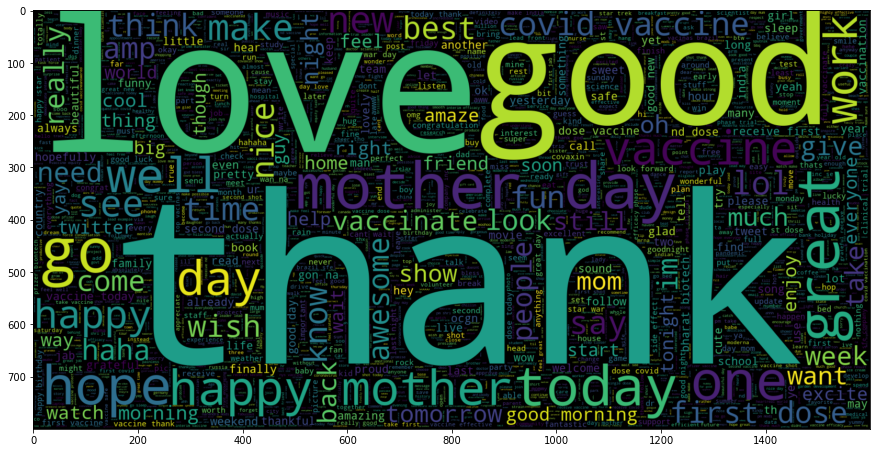

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 31468 , width = 1600 , height = 800).generate(" ".join(new_data[new_data.sentiment == 'positive'].text_))
plt.imshow(wc , interpolation = 'bilinear')

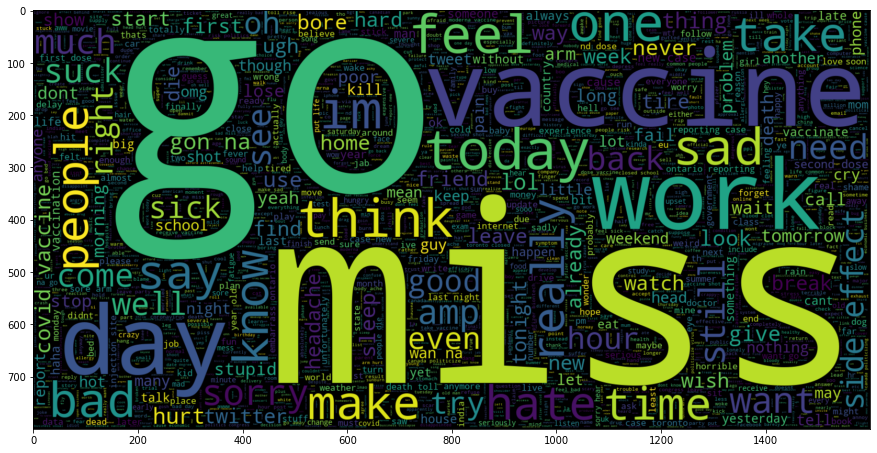

In [ ]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 31468 , width = 1600 , height = 800).generate(" ".join(new_data[new_data.sentiment == 'negative'].text_))
plt.imshow(wc , interpolation = 'bilinear')

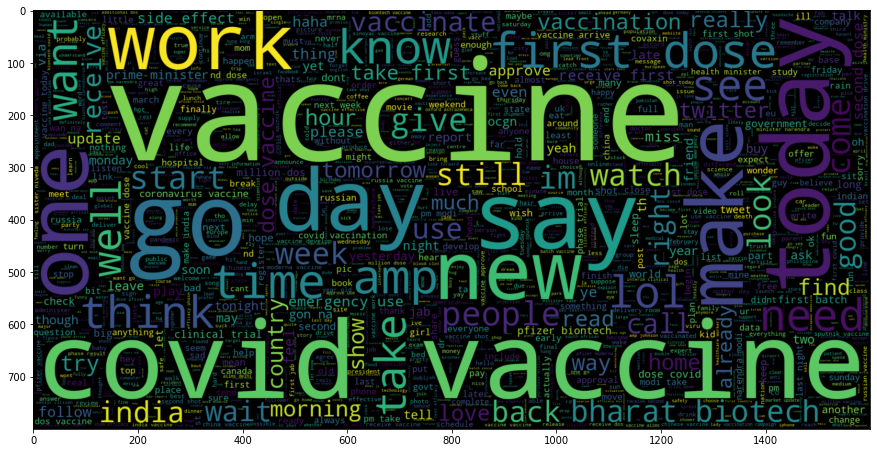

In [ ]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 31468 , width = 1600 , height = 800).generate(" ".join(new_data[new_data.sentiment == 'neutral'].text_))
plt.imshow(wc , interpolation = 'bilinear')

**remove duplicated**

In [ ]:
duplicated_rows = new_data['text_'][new_data['text_'].duplicated()]
print(duplicated_rows.shape)

(4115,)


In [ ]:
new_data = new_data.drop_duplicates( 
    subset=['text_'],
    keep='first',
    inplace=False )
new_data = new_data.reset_index(drop=True)
print(new_data.shape)

(56659, 4)


**toknization**

In [ ]:
from nltk.tokenize import word_tokenize
print('Before: ', new_data['text_'].values[17])
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
new_data['text_'] = new_data['text_'].apply(lambda x: tokenize(x))
print('after: ', new_data['text_'].values[17])

Before:  oh bad hope get good sleep issue lately
after:  ['oh', 'bad', 'hope', 'get', 'good', 'sleep', 'issue', 'lately']


**equilibre data**

In [ ]:
vc = new_data['sentiment'].value_counts()
vc.index = vc.index.astype(str)
#Index(['Neutral', 'Positive', 'Negative'], dtype='object')
sample_amounts = vc.to_dict()
#{'Neutral': 9960, 'Positive': 7893, 'Negative': 7649}
sampleCount = min([sample_amounts[x] for x in sample_amounts])
# 7649
result = pd.DataFrame()
#Empty DataFrame
#Columns: []
#Index: []
for sample in sample_amounts:
    df = new_data[new_data['sentiment']==sample]
    df = df.sample(sampleCount, replace= False)
    result = result.append(df, ignore_index=True)

In [ ]:
result.head()

,text,sentiment,text_,text2_
0,??? weekend standby duty??????????????????????...,neutral,"[weekend, standby, duty]",weekend standby duty
1,The approved Biotech Ltd.s for emergency us...,neutral,"[approve, biotech, ltd, emergency, use, pave, ...",approved biotech ltd emergency use paving way nat
2,at bingo hall in Kahnawake first dose,neutral,"[bingo, hall, kahnawake, first, dose]",bingo hall kahnawake first dose
3,2/2\nThis global initiative has signed an adva...,neutral,"[global, initiative, sign, advance, purchase, ...",global initiative signed advance purchase agre...
4,"Brazilian President claims, Coronavirus vacc...",neutral,"[brazilian, president, claim, coronavirus, vac...",brazilian president claims coronavirus vaccine...


In [ ]:
lab_to_int = { 
    "negative": 0, 
    "positive": 1, 
    "neutral":  2 
    }
result['sentiment'] = result['sentiment'].apply(lambda x: lab_to_int[x])

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(result.text_)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 25217


In [ ]:
A = result['text_'].tolist()
maxlenText = -1
i=0
while i<len(A):
     if(maxlenText<len(A[i])):
       maxlenText = len(A[i])
       i=i+1
     else:
       i=i+1
print(maxlenText)

25


In [ ]:
TRAIN_SIZE = 0.85

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(result , test_size=1-TRAIN_SIZE,
                                         random_state=42) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 32494
Test Data size 5735


In [ ]:
MAX_SEQUENCE_LENGTH = 25
#texts_to_sequences -> pour chaque vecteur donne un index
#from keras.preprocessing.sequence import pad_sequences
# les vecteurs deviennent de même taille
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text_),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text_),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (32494, 25)
Testing X Shape: (5735, 25)


In [ ]:
from numpy import array
y_train = train_data.sentiment.to_list()
y_test = test_data.sentiment.to_list()
y_train = array(y_train)
y_test = array(y_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (32494, 1)
y_test shape: (5735, 1)


In [ ]:
#download glove 
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2022-06-28 17:01:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-06-28 17:01:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-06-28 17:01:46--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
glove_vectors = dict()

In [ ]:
%%time
# ovrir file glove 
file = open('/content/glove.6B.50d.txt', encoding='utf-8')
for line in file:
  values = line.split()
  word = values[0]
  vectors = np.asarray(values[1:])
  glove_vectors[word] = vectors
file.close

CPU times: user 5.47 s, sys: 1.83 s, total: 7.31 s
Wall time: 7.29 s


In [ ]:
# combien de word dans glove  : len(glove_vectors.keys())
#len(glove_vectors['corona'])

# supprimer les mots qui n'existes pas dans glove 
# word_vector_matrix  matrice qui est utiliser pour stocker un vecteur de float pour chaque mot
# 50 signifie que , dans ce fichier chaque mot a un vecteur de taille 50
EMBEDDING_DIM = 50
word_vector_matrix = np.zeros((vocab_size, EMBEDDING_DIM ))
for word, index in tokenizer.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
       word_vector_matrix[index] = vector
  # word les mots qui n'existes pas dans glove 
#word_vector_matrix.shape
print(word)

californis


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import  Bidirectional, LSTM, Dense, Input, Dropout, SpatialDropout1D
from keras.layers import Conv1D, Bidirectional, SpatialDropout1D, GlobalMaxPooling1D, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
LR =0.0001          #1e-4 # alpha 0.0001
BATCH_SIZE = 64
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0,
                                     monitor = 'val_loss',
                                     verbose = 1)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[word_vector_matrix],
                                          input_length=25,
                                          trainable=False)

In [ ]:
#model = Sequential()
#model.add(Embedding(vocab_size, EMBEDDING_DIM,weights=[word_vector_matrix],input_length=14,trainable=True))
#model.add(SpatialDropout1D(0.3))
#model.add(LSTM(EMBEDDING_DIM,activation='relu', recurrent_dropout=0.3, dropout=0.3))
#model.add(Dropout(0.2))
#model.add(Dense(EMBEDDING_DIM, activation='relu'))
#model.add(Dense(3, activation = 'Softmax'))
#model.summary()

#model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Model lstm**

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#model.add(SpatialDropout1D(0.3))
x = LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=tf.keras.regularizers.L2(0.001))(embedding_sequences)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001))(x)
outputs = Dense(3, activation='Softmax')(x)
model = tf.keras.Model(sequence_input, outputs)
model.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 25, 50)            1258050   
                                                                 
 lstm_4 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,291,845
Trainable params: 33,795
Non-traina

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test),callbacks=[ReduceLROnPlateau])

Epoch 1/20
1016/1016 [==============================] - 42s 35ms/step - loss: 1.1475 - accuracy: 0.4858 - val_loss: 1.0082 - val_accuracy: 0.6155 - lr: 1.0000e-04
Epoch 2/20
1016/1016 [==============================] - 36s 35ms/step - loss: 0.9909 - accuracy: 0.6006 - val_loss: 0.9235 - val_accuracy: 0.6410 - lr: 1.0000e-04
Epoch 3/20
1016/1016 [==============================] - 36s 35ms/step - loss: 0.9375 - accuracy: 0.6207 - val_loss: 0.8869 - val_accuracy: 0.6527 - lr: 1.0000e-04
Epoch 4/20
1016/1016 [==============================] - 42s 41ms/step - loss: 0.9101 - accuracy: 0.6346 - val_loss: 0.8652 - val_accuracy: 0.6602 - lr: 1.0000e-04
Epoch 5/20
1016/1016 [==============================] - 36s 36ms/step - loss: 0.8881 - accuracy: 0.6444 - val_loss: 0.8522 - val_accuracy: 0.6668 - lr: 1.0000e-04
Epoch 6/20
1016/1016 [==============================] - 36s 35ms/step - loss: 0.8698 - accuracy: 0.6515 - val_loss: 0.8336 - val_accuracy: 0.6718 - lr: 1.0000e-04
Epoch 7/20
1016/1016 [

In [ ]:
s,(at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

**Tester le model**

In [ ]:
score = model.evaluate(x_test, y_test, verbose =0) 
score

# **Model Bi-LSTM**

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x1 = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, activation='relu'))(embedding_sequences)
x1 = Dropout(0.2)(x1)
x1 = Dense(128, activation='relu')(x1)
outputs = Dense(3, activation='Softmax')(x1)
model1 = tf.keras.Model(sequence_input, outputs)
model1.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

In [ ]:
history1 = model1.fit(x_train, y_train, batch_size=64, epochs=30,
                    validation_data=(x_test, y_test),callbacks=[ReduceLROnPlateau])

# **Model CNN**

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
g = Conv1D(64,4, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001))(embedding_sequences)
g = MaxPooling1D()(g)
g = Flatten()(g)
g = Dropout(0.2)(g)
#x1 = BatchNormalization()(x1)
g= Dense(16, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.001))(g)
g = Dropout(0.2)(g)
#x1 = BatchNormalization()(x1)
outputs = Dense(3, activation='Softmax')(g)
mo = tf.keras.Model(sequence_input, outputs)
mo.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mo.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 25, 50)            1258050   
                                                                 
 conv1d (Conv1D)             (None, 22, 64)            12864     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 704)               0         
                                                                 
 dropout_5 (Dropout)         (None, 704)               0         
                                                           

In [ ]:
his = mo.fit(x_train, y_train, batch_size=64, epochs=30,
                    validation_data=(x_test, y_test),callbacks=[ReduceLROnPlateau])

Epoch 1/30
508/508 [==============================] - 5s 9ms/step - loss: 1.1679 - accuracy: 0.4068 - val_loss: 1.1066 - val_accuracy: 0.5236 - lr: 1.0000e-04
Epoch 2/30
508/508 [==============================] - 4s 8ms/step - loss: 1.0783 - accuracy: 0.5152 - val_loss: 1.0130 - val_accuracy: 0.5813 - lr: 1.0000e-04
Epoch 3/30
508/508 [==============================] - 4s 8ms/step - loss: 1.0095 - accuracy: 0.5660 - val_loss: 0.9610 - val_accuracy: 0.6098 - lr: 1.0000e-04
Epoch 4/30
508/508 [==============================] - 4s 8ms/step - loss: 0.9688 - accuracy: 0.5936 - val_loss: 0.9318 - val_accuracy: 0.6157 - lr: 1.0000e-04
Epoch 5/30
508/508 [==============================] - 4s 8ms/step - loss: 0.9421 - accuracy: 0.6109 - val_loss: 0.9143 - val_accuracy: 0.6235 - lr: 1.0000e-04
Epoch 6/30
508/508 [==============================] - 4s 8ms/step - loss: 0.9175 - accuracy: 0.6231 - val_loss: 0.8983 - val_accuracy: 0.6303 - lr: 1.0000e-04
Epoch 7/30
508/508 [==========================

In [ ]:
s,(at1, al1) = plt.subplots(2,1)
at1.plot(his.history['accuracy'], c= 'b')
at1.plot(his.history['val_accuracy'], c='r')
at1.set_title('model accuracy')
at1.set_ylabel('accuracy')
at1.set_xlabel('epoch')
at1.legend(['BLSTM_train', 'BLSTM_val'], loc='upper left')

al1.plot(his.history['loss'], c='m')
al1.plot(his.history['val_loss'], c='c')
al1.set_title('model loss')
al1.set_ylabel('loss')
al1.set_xlabel('epoch')
al1.legend(['train', 'val'], loc = 'upper left')

#**BERT**

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow_gpu

In [ ]:
 !pip show tensorflow

In [ ]:
#pour regler le problème de import tenserflow_text 
!pip install -U tensorflow-text==2.6.0

In [ ]:
!pip install tensorflow_text

In [ ]:
import tensorflow as hub
import tensorflow_text as text
#import tensorflow as test 
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
!pip install tf-nightly

In [ ]:
bert_path = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'

In [ ]:
pip install --upgrade tensorflow_hub

In [ ]:
pip install tensorflow tensorflow-hub

In [ ]:
import tensorflow_hub as hub
model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = model(["The rain in Spain.", "falls",
                      "mainly", "In the plain!"])
print(embeddings.shape) 

In [ ]:
class BertLayer(tf.keras.layers.Layer):
    def __init__(self, n_fine_tune_layers=10, **kwargs):
        self.n_fine_tune_layers = n_fine_tune_layers
        self.trainable = True
        self.output_size = 768
        super(BertLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.bert = hub.Module(
            bert_path,
            trainable=self.trainable,
            name="{}_module".format(self.name)
            )
        trainable_vars = self.bert.variables
        
        # Remove unused layers
        trainable_vars = [var for var in trainable_vars if not "/cls/" in var.name]
        
        # Select how many layers to fine tune
        trainable_vars = trainable_vars[-self.n_fine_tune_layers :]
        
        # Add to trainable weights
        for var in trainable_vars:
            self._trainable_weights.append(var)
        
        # Add non-trainable weights
        for var in self.bert.variables:
            if var not in self._trainable_weights:
                self._non_trainable_weights.append(var)
        
        super(BertLayer, self).build(input_shape)

    def call(self, inputs):
        inputs = [K.cast(x, dtype="int32") for x in inputs]
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(
            input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids
        )
        result = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
            "pooled_output"
        ]
        return result

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_size)

In [ ]:
from tensorflow.keras.models import Model
max_seq_length = 128  # Your choice here.
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_inputs = [input_word_ids, input_mask, segment_ids]
# Instantiate the custom Bert Layer defined above
bert_output = BertLayer(n_fine_tune_layers=3)(bert_inputs)
lstm = LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=tf.keras.regularizers.L2(0.001))(bert_output)
d = Dropout(0.2)(lstm)
dense =Dense(256, activation='relu')(d)
pred = tf.keras.layers.Dense(1, activation='sigmoid')(dense)
model = tf.keras.models.Model(inputs=bert_inputs, outputs=pred)

model.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
def get_stokens(stokens):
    return ["[CLS]"] + stokens + ["[SEP]"]
result['text_'] = result['text_'].apply(lambda x: get_stokens(x))   

def get_masks(tokens, max_seq_length):
     """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))
    
result['get_masks'] = result['text_'].apply(lambda x : get_masks(x, 128)

def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

result['get_segments'] = result['text_'].apply(lambda x : get_segments(x, 128)

def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

result['get_ids'] = result['text_'].apply(lambda x : get_ids(x, tokenizer, 128))



In [ ]:
# n9asam result l tain more manzidalaha ids mask .....
train_label= train_data.sentiment.to_list()
test_label = test_data.sentiment.to_list()

train_input_ids = train_data.get_ids.to_list()
train_input_masks  = train_data.get_masks.to_list()
train_segment_ids = train_data.get_segment.to_list()

test_input_ids = test_data.get_ids.to_list()
test_input_masks = test_data.get_masks.to_list()
test_segment_ids= test_data.get_segment.to_list()

In [ ]:
model.fit(
    [train_input_ids, train_input_masks, train_segment_ids], 
    train_labels,
    validation_data=([test_input_ids, test_input_masks, test_segment_ids], test_labels),
    epochs=1,
    batch_size=32
)

In [ ]:

model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = model(["The rain in Spain.", "falls",
                      "mainly", "In the plain!"])
print(embeddings.shape) 

In [ ]:
#exemple 
text_test = ['nice' , 'day' ]
#tensorflow_text obligatoire
text_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
encoder_inputs = text_preprocess_model(text_test)
encoder_inputs.keys()

In [ ]:
#afficher: vecteur 1 -> "nice day" , vecteur 2 -> "nice oo" 
encoder_inputs['input_word_ids'] 

In [ ]:
# création du model 2 
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
bert_result = bert_model(encoder_inputs)
bert_result.keys()


In [ ]:
bert_result['sequence_output']
# vecteur 1 et 2 de taille 768

In [ ]:
bert_result['sequence_output']
# 2 mots 128 combien de mot et chaque mot de taille 768

In [ ]:
len (bert_result['sequence_output'])

In [ ]:

def bert(text):
    text_preprocess_model = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
    encoder_inputs = text_preprocess_model (text)
    #return encoder_inputs

    bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")
    bert_result = bert_model(encoder_inputs)
    return bert_result['sequence_output']
#df['bert_text'] = 
#len((df['inputs_text_lemmatized'].apply(lambda x: bert(x)))

In [ ]:
def get_masks(tokens, max_seq_length):
    """Mask for padding"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))


def get_segments(tokens, max_seq_length):
    """Segments: 0 for the first sequence, 1 for the second"""
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))


def get_ids(tokens, tokenizer, max_seq_length):
    """Token ids from Tokenizer vocab"""
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids
s = "This is a nice sentence."
stokens = tokenizer.tokenize(s)
stokens = ["[CLS]"] + stokens + ["[SEP]"]

input_ids = get_ids(stokens, tokenizer, max_seq_length)
input_masks = get_masks(stokens, max_seq_length)
input_segments = get_segments(stokens, max_seq_length)


**model bert**

In [ ]:
# Build model
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow_text as text  # Registers the ops.
import tensorflow as tf
import tensorflow_hub as hub 
max_seq_length = 128  # Your choice here.
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

Model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=[pooled_output, sequence_output])
#in_id = tf.keras.layers.Input(shape=(max_seq_length,), name="input_ids")
#in_mask = tf.keras.layers.Input(shape=(max_seq_length,), name="input_masks")
#in_segment = tf.keras.layers.Input(shape=(max_seq_length,), name="segment_ids")
#bert_inputs = [in_id, in_mask, in_segment]

# Instantiate the custom Bert Layer defined above
#bert_output = BertLayer(n_fine_tune_layers=10)(bert_inputs)
#bert_output = BertLayer(n_fine_tune_layers=10)(bert_inputs)
# Build the rest of the classifier 
#dense = tf.keras.layers.Dense(256, activation='relu')(bert_output)
#pred = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

#model = tf.keras.models.Model(inputs=bert_inputs, outputs=pred)
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dense(3, activation = 'Softmax'))
model.summary()



In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    [train_input_ids, train_input_masks, train_segment_ids], 
    train_labels,
    validation_data=([test_input_ids, test_input_masks, test_segment_ids], test_labels),
    epochs=1,
    batch_size=32
)

In [ ]:
# text_input = ["This is a sample sentence."]
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1")
encoder_inputs = preprocessor(text_input) # dict with keys: 'input_mask', 'input_type_ids', 'input_word_ids'
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [ ]:
len(new_data['text_'])

In [ ]:
A = train_data['text_2'].tolist()


In [ ]:
t = test_data['text_2'].tolist()
z=['love dad','nice day ']

In [ ]:
x = bert(z)

In [ ]:
x

In [ ]:
x_tr = bert(A)

In [ ]:
i=0
while i <4:
      x_t = bert(t[i]) 
      i= i+1  

In [ ]:
len(x)

In [ ]:
x_t.shape

In [ ]:
print (matrixe[0])

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
import tensorflow as tf
embedding_layer_bert = tf.keras.layers.Embedding(vocab_size,128,input_length=768,trainable=False)

In [ ]:
from keras.layers import BatchNormalization ,Flatten
sequence_input = Input(shape=(768,), dtype='int32')
embedding_sequences = embedding_layer_bert(sequence_input)
m = Conv1D(64,4, activation='relu')(embedding_sequences)
m = MaxPooling1D()(m)
m = Flatten()(m)
#x1 = Dropout(0.2)(x1)
#x1 = BatchNormalization()(x1)
m= Dense(16, activation='relu')(m)
#x1 = Dropout(0.2)(x1)
#x1 = BatchNormalization()(x1)
outputs = Dense(3, activation='Softmax')(m)
m = tf.keras.Model(sequence_input, outputs)
m.summary()

In [ ]:
LR = 1e-3
BATCH_SIZE = 1024
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [ ]:
u =  y_train[:4]

In [ ]:
print(u)

In [ ]:
print(x[0])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

m.compile(optimizer=Adam(learning_rate=0), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

In [ ]:
hoy = m.fit(x_tr, y_train, batch_size=32, epochs=5, callbacks=[ReduceLROnPlateau])

In [ ]:
lab_to_int = { 
    "Negative": 0, 
    "Positive": 1, 
    "Neutral":  2 
    }
new_data['sentiment'] = new_data['sentiment'].apply(lambda x: lab_to_int[x])
new_data.head()

K_fold

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau
EarlyStopping = EarlyStopping(monitor="val_loss",
                              min_delta=0,
                              patience=0,
                              verbose=4,
                              mode="auto",
                              baseline=None,
                              restore_best_weights=False)


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_DIM,weights=[word_vector_matrix],input_length=10,trainable=True))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(EMBEDDING_DIM, recurrent_dropout=0.3, dropout=0.3))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = 'Softmax'))
model.summary()
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 50)            1260850   
                                                                 
 spatial_dropout1d (SpatialD  (None, 10, 50)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 153       
                                                        

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in cv.split(result) :
    print(train_index, test_index )
    train_data, test_data = result.iloc[train_index], result.iloc[test_index]

    MAX_SEQUENCE_LENGTH = 10
    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text_),
                        maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text_),
                       maxlen = MAX_SEQUENCE_LENGTH)

    y_train = train_data.sentiment.to_list()
    y_test = test_data.sentiment.to_list()
    y_train = array(y_train)
    y_test = array(y_test)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))
   


[    0     1     2 ... 38226 38227 38228] [    6    18    22 ... 38211 38221 38222]
Epoch 1/10
1076/1076 [==============================] - 38s 31ms/step - loss: 1.0575 - accuracy: 0.4433 - val_loss: 0.9462 - val_accuracy: 0.5914
Epoch 2/10
1076/1076 [==============================] - 33s 31ms/step - loss: 0.9616 - accuracy: 0.5512 - val_loss: 0.8301 - val_accuracy: 0.6471
Epoch 3/10
1076/1076 [==============================] - 33s 31ms/step - loss: 0.9095 - accuracy: 0.5854 - val_loss: 0.7841 - val_accuracy: 0.6686
Epoch 4/10
1076/1076 [==============================] - 35s 33ms/step - loss: 0.8793 - accuracy: 0.6082 - val_loss: 0.7550 - val_accuracy: 0.6827
Epoch 5/10
1076/1076 [==============================] - 33s 30ms/step - loss: 0.8503 - accuracy: 0.6221 - val_loss: 0.7298 - val_accuracy: 0.6926
Epoch 6/10
1076/1076 [==============================] - 34s 32ms/step - loss: 0.8234 - accuracy: 0.6372 - val_loss: 0.7092 - val_accuracy: 0.7005
Epoch 7/10
1076/1076 [==================

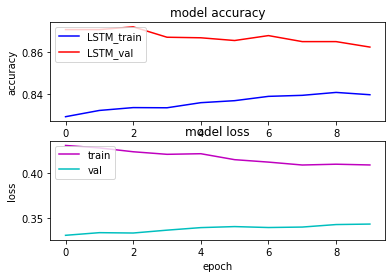

In [ ]:
s,(at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

**save model**

In [ ]:
model.save("sentiment covide.model")

In [ ]:
test ="i liked vaccines"

In [ ]:
test = array(test)
test = test.reshape(-1,1)

In [ ]:
a = model.predict(test)

UnimplementedError: ignored

In [ ]:
print(a)

[[6.4877093e-01 1.1850462e-01 2.3272443e-01]
 [2.7489260e-02 1.9522356e-02 9.5298839e-01]
 [1.8781079e-01 1.4471315e-01 6.6747612e-01]
 ...
 [9.8694557e-01 1.6283211e-03 1.1426162e-02]
 [9.8094338e-01 2.6364883e-03 1.6420145e-02]
 [9.9191684e-01 7.3402090e-04 7.3490557e-03]]


In [ ]:
result = a.argmax(axis=1)

In [ ]:
print(result)

[0 2 2 ... 0 0 0]


In [ ]:
test_data['predict_sentiment'] = result
test_data['predict_sentiment'] = np.where((test_data.predict_sentiment==0),'0',test_data.predict_sentiment)
test_data['predict_sentiment'] = np.where((test_data.predict_sentiment==1),'1',test_data.predict_sentiment)
test_data['predict_sentiment'] = np.where((test_data.predict_sentiment==2),'2',test_data.predict_sentiment)

In [ ]:
test_data.head()

,text,sentiment,text_,text2_,predict_sentiment
10,dang that burrito and toaster strudle(sp?) was...,2,"[dang, burrito, toaster, strudle, sp, tease, i...",dang burrito toaster strudle sp tease im still...,0
19,eating maccies,2,"[eat, maccies]",eating maccies,2
43,It`s a windy and rainy day,2,"[windy, rainy, day]",windy rainy day,2
52,_DIG up late again I see? You missed a great ...,2,"[dig, late, see, miss, great, time, donny, bir...",dig late see missed great time donny birthday ...,2
55,"@ 102.7 KIIS-FM hey, I can`t seems to get ryan...",2,"[kiis, fm, hey, seem, get, ryan, show, online,...",kiis fm hey seems get ryan show online not right,2


In [ ]:
test_data.predict_sentiment.value_counts(normalize=True)

0    0.347985
1    0.332548
2    0.319466
Name: predict_sentiment, dtype: float64

In [ ]:
test_data.sentiment.value_counts(normalize=True)

0    0.334380
1    0.333072
2    0.332548
Name: sentiment, dtype: float64

In [ ]:
mo = Sequential()
mo.add(Embedding(vocab_size, EMBEDDING_DIM,weights=[word_vector_matrix],input_length=25,trainable=True))
mo.add(SpatialDropout1D(0.3))
mo.add(Conv1D(64,4, activation='relu'))
mo.add(MaxPooling1D())
mo.add(Flatten())
mo.add(Dropout(0.2))
mo.add(Dense(EMBEDDING_DIM, activation='relu'))
mo.add(Dropout(0.2))
mo.add(Dense(3, activation = 'Softmax'))
mo.summary()

mo.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 25, 50)            1258050   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 25, 50)           0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 22, 64)            12864     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 704)               0         
                                                                 
 dropout_9 (Dropout)         (None, 704)              

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=0, shuffle=True)
for train_index, test_index in cv.split(result) :
    print(train_index, test_index )
    train_data, test_data = result.iloc[train_index], result.iloc[test_index]

    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text_),
                        maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text_),
                       maxlen = MAX_SEQUENCE_LENGTH)

    y_train = train_data.sentiment.to_list()
    y_test = test_data.sentiment.to_list()
    y_train = array(y_train)
    y_test = array(y_test)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    history = mo.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

[    0     1     2 ... 38226 38227 38228] [    6    18    22 ... 38211 38221 38222]
Epoch 1/10
1076/1076 [==============================] - 24s 22ms/step - loss: 1.0773 - accuracy: 0.4223 - val_loss: 0.9946 - val_accuracy: 0.5480
Epoch 2/10
1076/1076 [==============================] - 22s 21ms/step - loss: 0.9847 - accuracy: 0.5262 - val_loss: 0.8954 - val_accuracy: 0.6181
Epoch 3/10
1076/1076 [==============================] - 22s 20ms/step - loss: 0.9230 - accuracy: 0.5712 - val_loss: 0.8352 - val_accuracy: 0.6508
Epoch 4/10
1076/1076 [==============================] - 21s 19ms/step - loss: 0.8749 - accuracy: 0.6063 - val_loss: 0.7895 - val_accuracy: 0.6743
Epoch 5/10
1076/1076 [==============================] - 21s 20ms/step - loss: 0.8346 - accuracy: 0.6282 - val_loss: 0.7536 - val_accuracy: 0.6913
Epoch 6/10
1076/1076 [==============================] - 22s 20ms/step - loss: 0.8043 - accuracy: 0.6449 - val_loss: 0.7225 - val_accuracy: 0.7055
Epoch 7/10
1076/1076 [==================